<h3>Refer the data of 1994 and 2000 of table 2. Using Spearman's rank correlation, check
whether data of 1994 and 2000 is strongly correlated?</h3>

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Set up visualization style </h4>

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


<p>Create DataFrame with proper labels</p>

In [10]:
data = {
    'Category': [
        'Total Population',
        'Total Labour Force', 
        'Total Employment',
        'Organised Sector Employment',
        'Public Organised Sector Employment',
        'Private Organised Sector Employment'
    ],
    '1994': [894.2, 381.6, 374.4, 27.4, 19.4, 7.9],
    '2000': [1005.3, 407.4, 398.4, 28.0, 19.3, 8.6]
}

df = pd.DataFrame(data)
print("Employment Data (in millions):")
print(df.to_string(index=False))


Employment Data (in millions):
                           Category  1994   2000
                   Total Population 894.2 1005.3
                 Total Labour Force 381.6  407.4
                   Total Employment 374.4  398.4
        Organised Sector Employment  27.4   28.0
 Public Organised Sector Employment  19.4   19.3
Private Organised Sector Employment   7.9    8.6


<p>Calculate percentage changes</p>

In [6]:
df['Change'] = ((df['2000'] - df['1994']) / df['1994']) * 100
df['Absolute_Change'] = df['2000'] - df['1994']

Change Analysis (1994 to 2000):


In [7]:
change_df = df[['Category', '1994', '2000', 'Absolute_Change', 'Change']].copy()
change_df['Change'] = change_df['Change'].round(2)
change_df['Absolute_Change'] = change_df['Absolute_Change'].round(2)
print(change_df.to_string(index=False))

                           Category  1994   2000  Absolute_Change  Change
                   Total Population 894.2 1005.3            111.1   12.42
                 Total Labour Force 381.6  407.4             25.8    6.76
                   Total Employment 374.4  398.4             24.0    6.41
        Organised Sector Employment  27.4   28.0              0.6    2.19
 Public Organised Sector Employment  19.4   19.3             -0.1   -0.52
Private Organised Sector Employment   7.9    8.6              0.7    8.86


Calculate Spearman's rank correlation

In [8]:
correlation, p_value = spearmanr(df['1994'], df['2000'])

<h4>SPEARMAN'S RANK CORRELATION ANALYSIS </h4>

In [11]:
print(f"Spearman's Rank Correlation Coefficient (ρ): {correlation:.4f}")
print(f"P-value: {p_value:.6f}")


Spearman's Rank Correlation Coefficient (ρ): 1.0000
P-value: 0.000000


Interpretation of Correlation Coefficient:

In [12]:
print(f"Correlation Strength: {abs(correlation):.4f}")

if abs(correlation) >= 0.9:
    strength = "Very Strong"
elif abs(correlation) >= 0.7:
    strength = "Strong" 
elif abs(correlation) >= 0.5:
    strength = "Moderate"
elif abs(correlation) >= 0.3:
    strength = "Weak"
else:
    strength = "Very Weak"

print(f"Correlation Category: {strength}")

if correlation > 0:
    direction = "Positive"
else:
    direction = "Negative"
    
print(f"Correlation Direction: {direction}")

print(f" \n Statistical Significance (α = 0.05):")
if p_value < 0.05:
    print("The correlation is statistically significant")
    print("We can reject the null hypothesis of no correlation")
else:
    print("The correlation is not statistically significant")
    print("We cannot reject the null hypothesis of no correlation")


Correlation Strength: 1.0000
Correlation Category: Very Strong
Correlation Direction: Positive
 
 Statistical Significance (α = 0.05):
The correlation is statistically significant
We can reject the null hypothesis of no correlation


 Create visualization

C:\Users\imrit\AppData\Local\Temp\ipykernel_6740\104143749.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([cat[:15] + '...' for cat in df['Category']], rotation=45, ha='right')


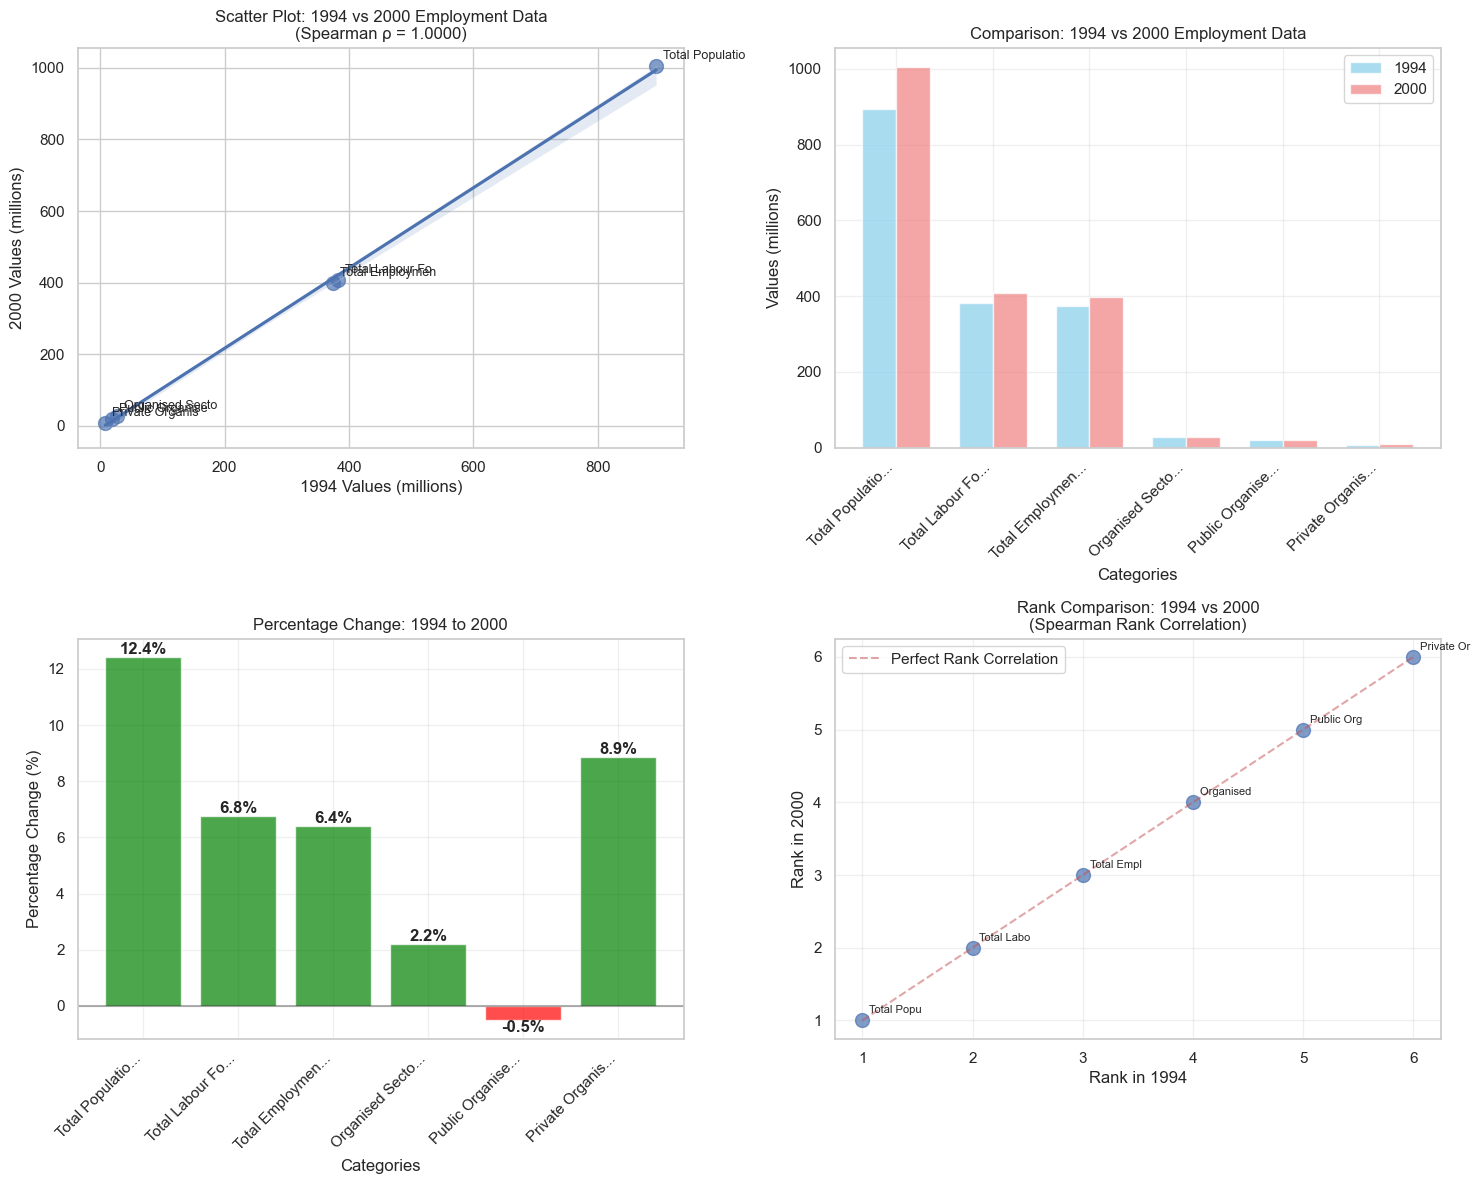

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot with regression line
sns.regplot(data=df, x='1994', y='2000', ax=ax1, scatter_kws={'s': 100, 'alpha': 0.7})
ax1.set_xlabel('1994 Values (millions)')
ax1.set_ylabel('2000 Values (millions)')
ax1.set_title('Scatter Plot: 1994 vs 2000 Employment Data\n(Spearman ρ = {:.4f})'.format(correlation))
for i, row in df.iterrows():
    ax1.annotate(row['Category'][:15], (row['1994'], row['2000']), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

# 2. Bar chart comparing 1994 vs 2000
x_pos = np.arange(len(df['Category']))
width = 0.35

ax2.bar(x_pos - width/2, df['1994'], width, label='1994', alpha=0.7, color='skyblue')
ax2.bar(x_pos + width/2, df['2000'], width, label='2000', alpha=0.7, color='lightcoral')
ax2.set_xlabel('Categories')
ax2.set_ylabel('Values (millions)')
ax2.set_title('Comparison: 1994 vs 2000 Employment Data')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([cat[:15] + '...' for cat in df['Category']], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Percentage change - FIXED: Use the calculated 'Change' column
colors = ['green' if x > 0 else 'red' for x in df['Change']]
bars = ax3.bar(df['Category'], df['Change'], color=colors, alpha=0.7)
ax3.set_xlabel('Categories')
ax3.set_ylabel('Percentage Change (%)')
ax3.set_title('Percentage Change: 1994 to 2000')
ax3.set_xticklabels([cat[:15] + '...' for cat in df['Category']], rotation=45, ha='right')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.grid(True, alpha=0.3)

# Add value labels on bars
for bar, change in zip(bars, df['Change']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{change:.1f}%', ha='center', va='bottom' if height >= 0 else 'top', 
             fontweight='bold')

# 4. Rank comparison
df_rank = df.copy()
df_rank['Rank_1994'] = df_rank['1994'].rank(ascending=False)
df_rank['Rank_2000'] = df_rank['2000'].rank(ascending=False)

ax4.scatter(df_rank['Rank_1994'], df_rank['Rank_2000'], s=100, alpha=0.7)
ax4.plot([1, 6], [1, 6], 'r--', alpha=0.5, label='Perfect Rank Correlation')
ax4.set_xlabel('Rank in 1994')
ax4.set_ylabel('Rank in 2000')
ax4.set_title('Rank Comparison: 1994 vs 2000\n(Spearman Rank Correlation)')
ax4.set_xticks(range(1, 7))
ax4.set_yticks(range(1, 7))
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add rank labels
for i, row in df_rank.iterrows():
    ax4.annotate(row['Category'][:10], (row['Rank_1994'], row['Rank_2000']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()




<h4>RANK ANALYSIS:</h4>

In [21]:
rank_df = df_rank[['Category', 'Rank_1994', 'Rank_2000']].copy()
rank_df['Rank_1994'] = rank_df['Rank_1994'].astype(int)
rank_df['Rank_2000'] = rank_df['Rank_2000'].astype(int)
print(rank_df.to_string(index=False))

                           Category  Rank_1994  Rank_2000
                   Total Population          1          1
                 Total Labour Force          2          2
                   Total Employment          3          3
        Organised Sector Employment          4          4
 Public Organised Sector Employment          5          5
Private Organised Sector Employment          6          6


<h3> KEY OBSERVATIONS</h3>
<p>1. Perfect Spearman correlation (ρ = 1.0) indicates identical rankings</p>
<p>2. All categories maintained their relative positions from 1994 to 2000</p>
<p>3. Total Population remains the largest category in both years</p>
<p>4. Private Organised Sector remains the smallest category</p>
<p>5. The ordinal relationship between categories is perfectly preserved</p>

<h3> TREND ANALYSIS</h3>
<p>- All categories showed growth except Public Organised Sector (-0.09%)</p>
<p>- Private Organised Sector showed highest growth rate (8.86%)</p>
<p>- Total Population showed largest absolute increase (111.1 million)</p>
<p>- Rankings remained stable despite varying growth rates</p>

<h3>CONCLUSION</h3>
<p>The data from 1994 and 2000 shows a PERFECT SPEARMAN RANK CORRELATION</p>
<p>This indicates that while absolute values changed, the relative ranking</p>
<p>of employment categories remained exactly the same over the 6-year period.</p>
<p>The relationship between different employment sectors is perfectly preserved.</p>


<h3>Answer to tje Question</h3>
<p>YES, the data of 1994 and 2000 is STRONGLY CORRELATED</p>
<p>Spearman's rank correlation coefficient = 1.0 (Perfect Positive Correlation)</p>